In [10]:
import pandas as pd
import pytz
import datetime
import matplotlib.pyplot as plt

In [4]:
df =  pd.read_json('/workspaces/Random-Python-Work/2024/April/9-April-2024/MDIA.json',lines=True)    
df.head()

,event_type,symbol,volume,accumulated_volume,official_open_price,vwap,open,close,high,low,aggregate_vwap,average_size,start_timestamp,end_timestamp,otc,return
0,A,MDIA,8646,2953666,3.28,3.9276,3.9001,3.9450,3.9450,3.9001,3.7384,247,1712669653000,1712669654000,NaN,0.202744
1,A,MDIA,983,2954649,3.28,3.9438,3.9455,3.9400,3.9455,3.9400,3.7385,109,1712669654000,1712669655000,NaN,0.201220
2,A,MDIA,4289,2958938,3.28,3.9464,3.9395,3.9465,3.9500,3.9395,3.7388,112,1712669655000,1712669656000,NaN,0.203201
3,A,MDIA,3524,2962462,3.28,3.9411,3.9400,3.9489,3.9489,3.9399,3.7390,271,1712669656000,1712669657000,NaN,0.203933
4,A,MDIA,6171,2968633,3.28,3.9425,3.9401,3.9401,3.9500,3.9400,3.7394,257,1712669657000,1712669658000,NaN,0.201250


In [8]:
df['start_timestamp'] = pd.to_datetime(df['start_timestamp'], unit='ms',utc=True).dt.tz_convert('America/New_York')
df['end_timestamp'] = pd.to_datetime(df['end_timestamp'], unit='ms',utc=True).dt.tz_convert('America/New_York')

In [9]:
df.head()

,event_type,symbol,volume,accumulated_volume,official_open_price,vwap,open,close,high,low,aggregate_vwap,average_size,start_timestamp,end_timestamp,otc,return
0,A,MDIA,8646,2953666,3.28,3.9276,3.9001,3.9450,3.9450,3.9001,3.7384,247,2024-04-09 09:34:13-04:00,2024-04-09 09:34:14-04:00,NaN,0.202744
1,A,MDIA,983,2954649,3.28,3.9438,3.9455,3.9400,3.9455,3.9400,3.7385,109,2024-04-09 09:34:14-04:00,2024-04-09 09:34:15-04:00,NaN,0.201220
2,A,MDIA,4289,2958938,3.28,3.9464,3.9395,3.9465,3.9500,3.9395,3.7388,112,2024-04-09 09:34:15-04:00,2024-04-09 09:34:16-04:00,NaN,0.203201
3,A,MDIA,3524,2962462,3.28,3.9411,3.9400,3.9489,3.9489,3.9399,3.7390,271,2024-04-09 09:34:16-04:00,2024-04-09 09:34:17-04:00,NaN,0.203933
4,A,MDIA,6171,2968633,3.28,3.9425,3.9401,3.9401,3.9500,3.9400,3.7394,257,2024-04-09 09:34:17-04:00,2024-04-09 09:34:18-04:00,NaN,0.201250


<Axes: >

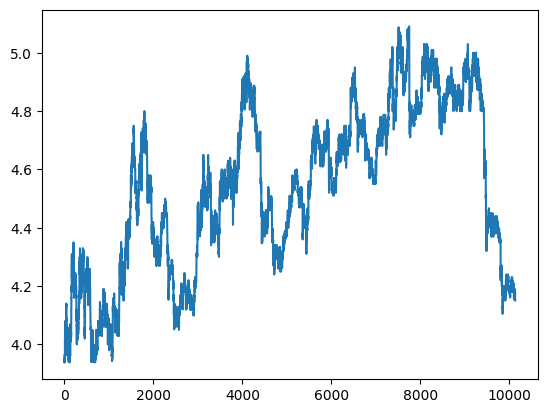

In [11]:
df['close'].plot()

In [13]:
df['close'].pct_change()

0             NaN
1       -0.001267
2        0.001650
3        0.000608
4       -0.002228
           ...   
10124   -0.000144
10125    0.002398
10126   -0.005359
10127   -0.001828
10128    0.000506
Name: close, Length: 10129, dtype: float64

In [19]:
dataset =df[['symbol','start_timestamp','close']]

In [20]:
dataset['pct_change'] = dataset['close'].pct_change()

/tmp/ipykernel_10570/3155829289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['pct_change'] = dataset['close'].pct_change()


In [22]:
dataset.dropna(inplace=True)

/tmp/ipykernel_10570/2639109627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(inplace=True)


In [23]:
dataset.reset_index(drop=True, inplace=True)

In [24]:
dataset.head()

,symbol,start_timestamp,close,pct_change
0,MDIA,2024-04-09 09:34:14-04:00,3.9400,-0.001267
1,MDIA,2024-04-09 09:34:15-04:00,3.9465,0.001650
2,MDIA,2024-04-09 09:34:16-04:00,3.9489,0.000608
3,MDIA,2024-04-09 09:34:17-04:00,3.9401,-0.002228
4,MDIA,2024-04-09 09:34:18-04:00,3.9400,-0.000025
